In [153]:
import pandas as pd
import csv
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns



# importing data

In [154]:
df = pd.read_csv('insurance.csv')
df_c=df.copy()
df_c['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

# data understanding


In [155]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


C:\Users\chemk\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


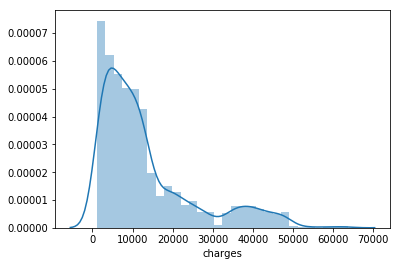

In [156]:
X=df['charges']
t=sns.distplot(X)

In [157]:
g1 = df.groupby( [ "smoker"] )['charges'].mean()
g1=pd.DataFrame(g1,columns=['smoker','charges'])


g1['smoker']=['no','yes']
g1


,smoker,charges
smoker,,
no,no,8434.268298
yes,yes,32050.231832


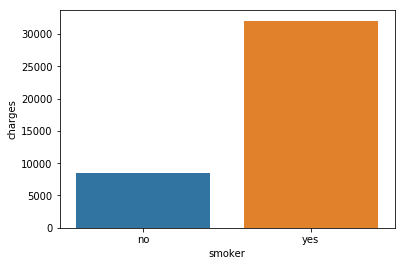

In [158]:
ax = sns.barplot( x='smoker',y="charges", data=g1)

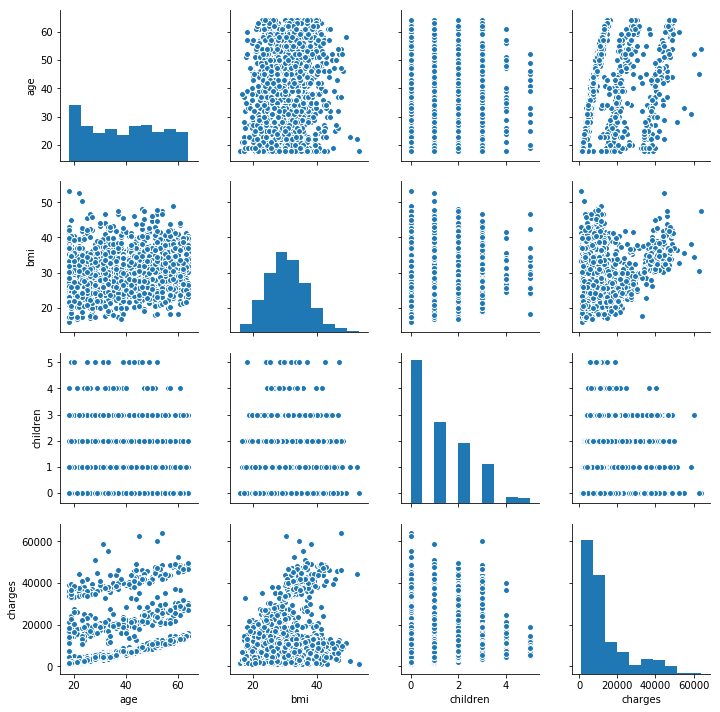

In [159]:
pairPlot = sns.pairplot(df)

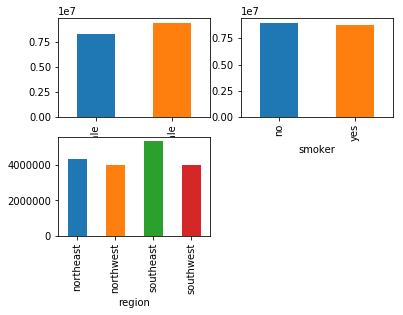

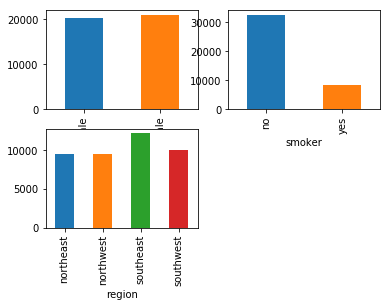

In [160]:
plt.figure(1)
plt.subplot(2,2,1)
df.groupby(['sex'])['charges'].sum().plot.bar()
plt.subplot(2,2,2)
df.groupby(['smoker'])['charges'].sum().plot.bar()
plt.subplot(2,2,3)
df.groupby(['region'])['charges'].sum().plot.bar()

plt.figure(2)
plt.subplot(2,2,1)
df.groupby(['sex'])['bmi'].sum().plot.bar()
plt.subplot(2,2,2)
df.groupby(['smoker'])['bmi'].sum().plot.bar()
plt.subplot(2,2,3)
df.groupby(['region'])['bmi'].sum().plot.bar()

In [161]:
df_var=pd.get_dummies(df, prefix=['sex','region','smoker']).head()
df_var

,age,bmi,children,charges,sex_female,sex_male,region_no,region_yes,smoker_northeast,smoker_northwest,smoker_southeast,smoker_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [162]:
df_=df
df_['smoker']=df['smoker'].map({'yes':1,'no':0})
df_.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,1,southwest,16884.92400
1,18,male,33.770,1,0,southeast,1725.55230
2,28,male,33.000,3,0,southeast,4449.46200
3,33,male,22.705,0,0,northwest,21984.47061
4,32,male,28.880,0,0,northwest,3866.85520


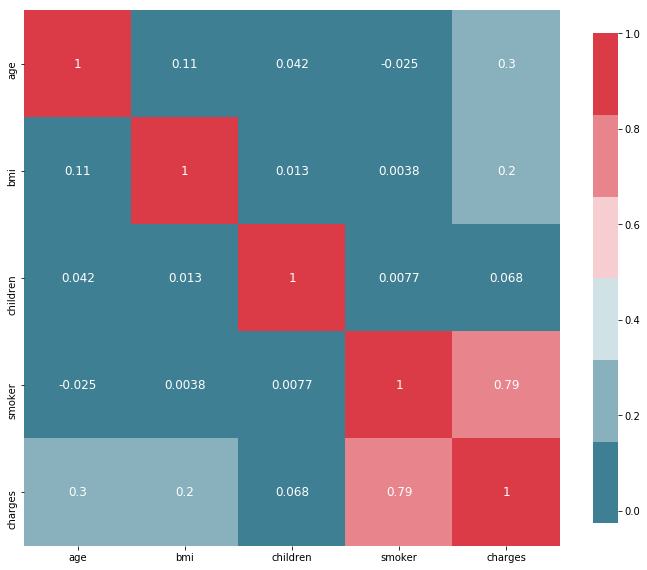

In [163]:
def plot_correlation_map( df):
    corr = df.corr()
    s , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = False )
    s = sns.heatmap(
        corr,
        cmap = cmap,
        square=True,
        cbar_kws={ 'shrink' : .9 },
        ax=ax,
        annot = True,
        annot_kws = { 'fontsize' : 12 }
        )
plot_correlation_map( df_ )

# data preparation 

In [86]:
df_c_var=pd.get_dummies(df_c, prefix=['smoker', 'sex','region'])
df_c_var.head()

,age,bmi,children,charges,smoker_female,smoker_male,sex_no,sex_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [87]:
df_c['smoker']=df_c['smoker'].map({'yes':1,'no':0})



In [88]:
df_c['region']=df_c['region'].map({'southwest':1,'southeast':2,'northwest':3,'northeast':4})

In [89]:
df_c['sex']=df_c['sex'].map({'male':1,'female':0})

In [90]:
my_list=df_c.columns

y=df_c['charges']
k=[i for i in my_list if not i =='charges' ]
X=df_c[k]


In [91]:
 X.drop([], axis=1).head()

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,1
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,3
4,32,1,28.880,0,0,3


# comparing different models


In [92]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)


                                                   

In [93]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
linearModel = LinearRegression()
linear = linearModel.fit(X_train, y_train)
linearPred = linear.predict(X_test)
mseLinear = mean_squared_error(y_test, linearPred)
rmseLinear = mseLinear**(1/2)


In [94]:
from sklearn.linear_model import Ridge
ridgeModel = Ridge()
ridge = ridgeModel.fit(X_train, y_train)
ridgePred = ridge.predict(X_test)
mseRidge = mean_squared_error(y_test, ridgePred)
rmseRidge = mseRidge**(1/2)

In [95]:
from sklearn.linear_model import Lasso
lassoModel = Lasso()
lasso = lassoModel.fit(X_train, y_train)
lassoPred = lasso.predict(X_test)
mseLasso = mean_squared_error(y_test, lassoPred)
rmseLasso = mseLasso**(1/2)

In [96]:
from sklearn.linear_model import ElasticNet
elasticNetModel = ElasticNet(alpha = 0.01, l1_ratio = 0.9, max_iter = 20)
ElasticNet = elasticNetModel.fit(X_train, y_train)
ElasticNetPred = ElasticNet.predict(X_test)
mseElasticNet = mean_squared_error(y_test, ElasticNetPred)
rmseElasticNet = mseElasticNet**(1/2)

In [97]:
performanceData = pd.DataFrame({"model":["linear", "lasso", "ridge", "elasticnet"], "rmse":[rmseLinear, rmseLasso, rmseRidge, rmseElasticNet]})
print(performanceData)

        model         rmse
0      linear  5459.022327
1       lasso  5459.328734
2       ridge  5466.375474
3  elasticnet  5466.909151


# implementation

In [98]:
regressor = LinearRegression()
regressor.fit(X_train,y_train)
y_pred = regressor.predict(X_test)

evaluation


In [99]:
print("Mean squared error: {:.2f}".format(mean_squared_error(y_test,y_pred)))
print("R2-score: {:.2f}".format(r2_score(y_test,y_pred)))

Mean squared error: 29800924.77
R2-score: 0.80


prediction

In [100]:
#[age,sex,bmi,children,smoker,region]
new_row=[20,1,24,1,1,1]
my_list=X_train.columns
x_=pd.DataFrame(columns=my_list)
x_.loc['e'] = new_row
p=regressor.predict(x_)
int(p)







24239

In [101]:
import statsmodels.api as sm
from scipy import stats

X_train2 = sm.add_constant(X_train)
linearModel = sm.OLS(y_train, X_train2)
linear = linearModel.fit()
print(linear.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     495.3
Date:                Fri, 10 Aug 2018   Prob (F-statistic):          9.85e-304
Time:                        11:02:07   Log-Likelihood:                -10859.
No. Observations:                1070   AIC:                         2.173e+04
Df Residuals:                    1063   BIC:                         2.177e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.273e+04   1230.490    -10.342      0.0